<a href="https://colab.research.google.com/github/supportchelsea/bigcontest_2019/blob/master/EDA_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Train

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
import sys
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook
import seaborn as sns

In [5]:
path = 'drive/My Drive/bigcontest2019/data/'
print(os.listdir(path + 'train'),'\n', 
      os.listdir(path + 'test'),'\n', 
      os.listdir(path + '../metrics'),'\n', 
      os.listdir(path + '../scripts'))

['train_label.csv', 'train_activity.csv', 'train_combat.csv', 'train_payment.csv', 'train_pledge.csv', 'train_trade.csv'] 
 ['test1_payment.csv', 'test2_payment.csv', 'test1_activity.csv', 'test1_combat.csv', 'test1_pledge.csv', 'test1_trade.csv', 'test2_activity.csv', 'test2_combat.csv', 'test2_pledge.csv', 'test2_trade.csv'] 
 ['score_function.py', '자체성능평가함수안내.pdf', 'score_function.r'] 
 ['explortary data', 'EDA1.ipynb']


In [0]:
def open_csvs(path):

  dflist = os.listdir(path)
  mod = sys.modules[__name__]
  
  for df in tqdm_notebook(dflist):
    tmp = pd.read_csv(path+df) #.fillna('')
    
    setattr(mod, '{}'.format(df.split('.')[0]), tmp)

In [9]:
open_csvs(path+'train/')

---
# 데이터 정의

### 레이블 (train_label)

유저의 생존 기간과 일별 평균 결제 금액을 제공

- acc_id 유저 아이디
- survival_time 생존 기간(일)
- amount_spent 일별 평균 결제 금액

In [11]:
train_label.head(3)

,acc_id,survival_time,amount_spent
0,27835,64,0.002559
1,12351,64,0.120154
2,125437,55,0.182593


In [28]:
train_label.describe()

,survival_time,amount_spent
count,40000.000000,40000.000000
mean,45.706700,0.124931
std,23.265907,0.722272
min,1.000000,0.000000
25%,24.000000,0.000000
50%,64.000000,0.020343
75%,64.000000,0.106119
max,64.000000,39.412632


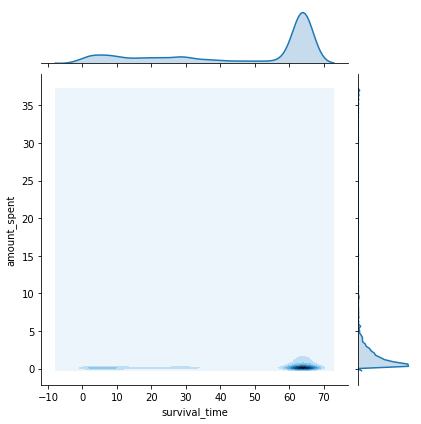

In [38]:
sns.jointplot(x=train_label["survival_time"], y=10*(np.log1p(train_label['amount_spent'])), kind="kde")

### 활동 (train_activity)

대상 유저의 캐릭터별 활동 이력 (일별 데이터)

- day 날짜
- acc_id 유저 아이디
- char_id 캐릭터 아이디
- server 캐릭터 서버
- playtime 일일 플레이시간
- npc_kill npc 를 죽인 횟수
- solo_exp 솔로 사냥 획득 경험치
- party_exp 파티 사냥 획득 경험치
- quest_exp 퀘스트 획득 경험치
- boss_monster 보스 몬스터 타격 여부 (0=미타격 ,1= 타격)
- death 캐릭터 사망 횟수
- revive 부활 횟수
- exp_recovery 경험치 복구 횟수(성당)
- fishing 일일 낚시 시간
- private_shop 일일 개인상점 운영 시간
- game_money_change 일일 아데나 변동량
- enchant_count 7 레벨 이상 아이템 인첸트 시도 횟수

In [53]:
train_activity.tail(3)

,day,acc_id,char_id,server,playtime,npc_kill,solo_exp,party_exp,quest_exp,rich_monster,death,revive,exp_recovery,fishing,private_shop,game_money_change,enchant_count
1601831,28,60388,78905,bs,1.137558,0.0,0.0,0.0,0.0,0,0.245883,0.247337,0.0,0.0,0.0,-0.003670,0.0
1601832,28,72319,196592,bs,1.142240,0.0,0.0,0.0,0.0,0,0.491767,0.494674,0.0,0.0,0.0,-0.002003,0.0
1601833,28,73739,383802,bs,1.125855,0.0,0.0,0.0,0.0,0,0.491767,0.494674,0.0,0.0,0.0,0.001131,0.0


In [13]:
train_activity.iloc[:,4:].describe()

,playtime,npc_kill,solo_exp,party_exp,quest_exp,rich_monster,death,revive,exp_recovery,fishing,private_shop,game_money_change,enchant_count
count,1.601834e+06,1.601834e+06,1.601834e+06,1.601834e+06,1.601834e+06,1.601834e+06,1.601834e+06,1.601834e+06,1.601834e+06,1.601834e+06,1.601834e+06,1.601834e+06,1.601834e+06
mean,1.043823e+00,4.947465e-01,2.333977e-01,1.290938e-01,1.056613e-01,1.233842e-01,7.406203e-02,6.628034e-02,5.687179e-02,1.937402e-01,2.628405e-01,-1.301906e-03,1.621690e-02
std,1.205552e+00,1.120514e+00,1.236795e+00,1.102296e+00,1.092334e+00,3.288778e-01,7.261568e-01,7.245752e-01,1.005399e+00,5.764657e-01,8.199551e-01,8.827070e-01,8.780636e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-8.478808e+01,0.000000e+00
25%,3.979114e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.335242e-03,0.000000e+00
50%,4.517465e-01,3.379401e-03,2.315290e-04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.764854e+00,3.463886e-01,2.178079e-02,0.000000e+00,8.676596e-04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.030153e-03,0.000000e+00
max,3.370544e+00,1.786622e+01,6.932613e+01,1.064465e+02,3.602985e+01,1.000000e+00,2.215410e+02,2.228505e+02,7.974367e+01,3.370544e+00,3.370544e+00,7.386443e+01,1.888458e+02


In [47]:
train_activity.groupby(['day','server']).sum().iloc[:,2:7] #각 서버별

playtime     npc_kill     solo_exp    party_exp    quest_exp
day server                                                                 
1   aa      1561.022755  1763.005477   716.942357   102.644919   133.814082
    ab      1716.823789  1890.053384   710.863115    59.401968   181.340979
    ac      1590.786527  1781.158606   689.826172    66.480451    93.577485
    ad      1887.214126  2218.751502   848.670554   213.400039   190.596181
    ae      1528.553186  1613.053004   679.780057   152.081737   114.772276
    af      1298.492526  1365.236118   457.475666    78.299894    37.207830
    ag      1610.061823  1867.897016   571.186147    97.339073    84.849763
    ah       925.284414  1206.497879   574.049835    85.089265   174.128513
    ai      1379.757734  1716.239974   560.132518    90.230015   148.139882
    aj       977.392080  1239.745440   364.293803    38.440269    80.595454
    ak      1198.471647  1375.517608   465.032461    18.153247   120.385589
    al      1461.341272  1797.467595   612.823867    33.958630    72.625452
    am      1537.164457  1736.609651   694.118077    26.108232   112.663622
    an      1957.351859  2101.904318  1021.518844    94.054964   179.201158
    ao      1360.707141  1484.504644   543.493085    62.351208    75.540209
    ap      1098.577163  1356.764636   451.810739    82.394302   116.416968
    aq      1360.004945  1656.226204   519.309471    70.084088   168.795221
    ar      2387.903683  2448.224323  1299.581095   517.877612   296.319975
    as      1852.881395  1817.618288  1022.260192   129.262394    91.211814
    at      1769.458102  2116.156266   603.058038    40.459493   135.861176
    au      1620.166431  1773.487365   684.811259    62.541923   185.071295
    av      1428.199934  1578.443206   709.026769    30.636617   174.911344
    aw      1042.251636  1215.770617   472.272005    30.772917    95.189467
    ax      1629.000064  1706.022692   800.486789   230.935257    81.164447
    ay      1515.686604  1680.705910  1146.849388   305.144828   228.045037
    az       937.298997  1246.421447  1304.502243   227.142531   149.364356
    bb       821.481036   827.436884   508.326930   303.902267    82.241831
    bc       855.001560   921.937103   687.372406   185.949510   116.340550
    bd      2150.521453  1672.781214  9206.246060  3759.870378  3951.259378
    bg       474.977460     0.000000     0.000000     0.000000    51.465045
...                 ...          ...          ...          ...          ...
28  ag      2444.247936   748.278808   135.242085   131.441270    74.912704
    ah      1495.212893   527.351140    99.607274    27.968764    13.572177
    ai      2143.162433   669.699961   153.660145    35.494380   123.596037
    aj      1490.470726   521.752148   136.536014    75.020991   104.384742
    ak      1804.544524   542.611501    99.904605    15.164114    86.477746
    al      2231.299805   666.090760   183.632968    32.672973   180.495660
    am      2373.700587   736.909489   200.956254   167.077906   146.971369
    an      3016.203422   856.013437   257.170864   141.855666   188.890589
    ao      2053.599602   646.116135   125.599219   121.585117   101.845286
    ap      1746.833329   561.485118   136.917352   108.782449    82.756240
    aq      2170.091671   689.579287   176.702354   114.958861   107.300494
    ar      3836.170055   979.813401   354.471981   401.135375   144.704312
    as      2832.129615   922.678206   250.337642   208.396354   165.705713
    at      2698.166895   841.964253   203.374446    74.049277   134.364110
    au      2557.846955   770.018157   247.145225    40.893674   205.197774
    av      2236.283060   703.074250   168.407030    90.106555   137.192465
    aw      1608.540397   513.372248   125.283372    51.240387   117.130743
    ax      2670.064988   789.174291   250.501507   136.493952   142.032892
    ay      2388.964000   698.920628   688.361423   487.250288   224.451012
    az      1414.219201   443.179722   337.742369   269.254381 

In [0]:
60388

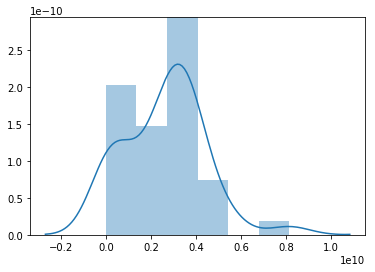

In [42]:
tmp = train_activity.groupby(['day','acc_id']).mean().iloc[:,1:2]

sns.distplot(train_activity.groupby('server').sum().iloc[:,1:2])

In [29]:
print(len(train_activity['acc_id'].unique()))
print(len(train_activity['char_id'].unique()))

40000
150960


In [54]:
train_activity[train_activity['acc_id']==60388]['server'].unique()

# 하나의 아이디는 하나의 서버인가? -> 아님

array(['bb', 'bc', 'bs'], dtype=object)

In [0]:
def group(df,by_list):
  
  names = df.columns
  
  tmp = df.groupby(by_list)

### 전투 (train_combat)

캐릭터 전투 활동 정보 일일 집계 제공

- day 날짜
- acc_id 유저 아이디
- char_id 캐릭터 아이디
- server 캐릭터 서버
- class 직업 : 0 군주, 기사 1, 요정 2, 마법사 3, 다크엘프4, 용기사 5, 환술사 6, 전사 7
- level 레벨
- pledge_cnt 혈맹 전투 횟수
- random_attacker_cnt 무작위 공격을 행한 전투 횟수
- random_defender_cnt 무작위 공격자로부터 공격을 받은 전투 횟수
- temp_cnt 단발성 전투 횟수
- same_pledge_cnt 동일 혈맹 전투 횟수
- etc_cnt 기타 전투 횟수
- num_opponent 전투 상대 캐릭터 수


In [13]:
train_combat.head(3)

,acc_id,char_id,server,class,level,pledge_cnt,random_attacker_cnt,random_defender_cnt,temp_cnt,same_pledge_cnt,etc_cnt,num_opponent
0,13809,54861,ap,2,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,13809,256332,ap,2,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,13809,307293,ap,3,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
train_combat.describe()

array([2, 3, 7, 4, 1, 5, 0, 6])

## 결제 (train_payment)

유저 결제 금액 일일 집계 제공

- day 날짜
- acc_id 유저 아이디
- amount_spent 결제 금액

In [18]:
train_payment.head(3)

,acc_id,amount_spent
0,27835,0.826123
1,27835,0.011735
2,27835,0.035204


### 혈맹 (train_pledge)

캐릭터 소속 혈맹 구성원들의 전투 정보 일일 집계 제공

- day 날짜
- acc_id 유저 아이디
- char_id 캐릭터 아이디
- server 캐릭터 서버
- pledge_id 혈맹 아이디
- play_char_cnt 접속 혈맹 캐릭터 수
- combat_char_cnt 전투 참여 혈맹 캐릭터 수
- pledge_combat_cnt 혈맹 전투 횟수의 합
- random_attacker_cnt 무작위공격(막피)을 행한 전투 횟수의 합
- random_defender_cnt 무작위공격(막피)으로 피해받은 전투 횟수의 합
- same_pledge_cnt 동일 혈맹 전투 횟수의 합
- temp_cnt 단발성 전투 횟수의 합
- etc_cnt 기타 전투 횟수의 합
- combat_play_time 전투 캐릭터 플레이 시간의 합
- non_combat_play_time 非전투 캐릭터 플레이 시간의 합


In [15]:
train_pledge.head(3)

,acc_id,char_id,server,pledge_id,play_char_cnt,combat_char_cnt,pledge_combat_cnt,random_attacker_cnt,random_defender_cnt,same_pledge_cnt,temp_cnt,etc_cnt,combat_play_time,non_combat_play_time
0,106660,345122,aa,381,0.036089,0.036089,0.0,0.0,0.0,0.0,0.0,0.007078,0.027568,0.000000
1,46383,161773,aa,10892,0.036089,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.006139
2,18495,321373,aa,13705,0.036089,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000347


### 거래 (train_trade)

캐릭터 거래 이력(교환, 개인상점) 일일 집계 제공

- day 거래 발생 일
- time 거래 발생 시간 (00:00:00 ~ 23:59:59)
- type 거래 구분 (교환창 = 1, 개인상점 = 0)
- server 거래 발생 서버
- source_acc_id 주는/판매 유저 아이디
- source_char_id 주는/판매 캐릭터 아이디
- target_acc_id 받는/구매 유저 아이디
- target_char_id 받는/구매 캐릭터 아이디
- item_type 아이템 종류 : 총 7개

weapon (무기), armor (방어구), accessory(액세서리), adena (아데나),  spell (스킬북), enchant_scroll (강화주문서), etc (기타)


- item_amount 거래 아이템 수량
- item_price 거래 가격

교환창 거래 (Type=1)일 경우 NA


In [48]:
train_trade.head(3)

,day,time,type,server,source_acc_id,source_char_id,target_acc_id,target_char_id,item_type,item_amount,item_price
0,7,21:13:05,1,ag,11439,385109,48152,34247,enchant_scroll,4.793968e-08,
1,2,15:33:00,1,al,22220,259705,43228,379826,enchant_scroll,4.314571e-06,
2,1,14:24:53,1,al,18212,164230,38145,34209,accessory,7.190952e-08,


In [22]:
len(train_trade['item_type'].unique())

7

In [50]:
len(train_trade['item_price'].isna()) # 교환장 거래 수

1849325